In [169]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

from skimage.segmentation import clear_border
img = cv.imread('Imatges/matricula_3.jpeg')
img_gris = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

In [170]:
kernel = np.ones((3,3), np.uint8)

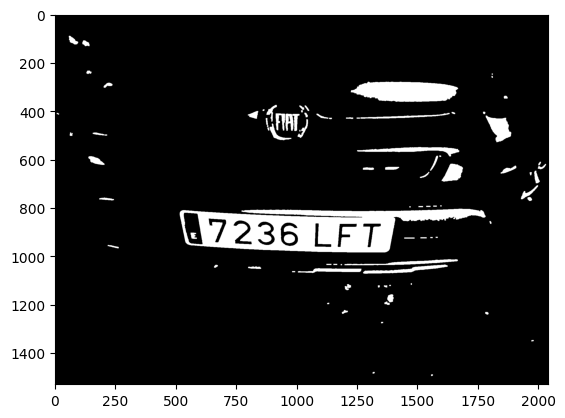

In [171]:
median = cv.medianBlur(img_gris, 3)
ret, th = cv.threshold(median, 0, 255, cv.THRESH_BINARY+cv.THRESH_OTSU)
kernel = np.ones((5,5), np.uint8)
opening = cv.morphologyEx(th, cv.MORPH_OPEN, kernel)
edge_touching_removed = clear_border(opening)
contours, hierarchy = cv.findContours(edge_touching_removed, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)

plt.imshow(edge_touching_removed, cmap="gray")

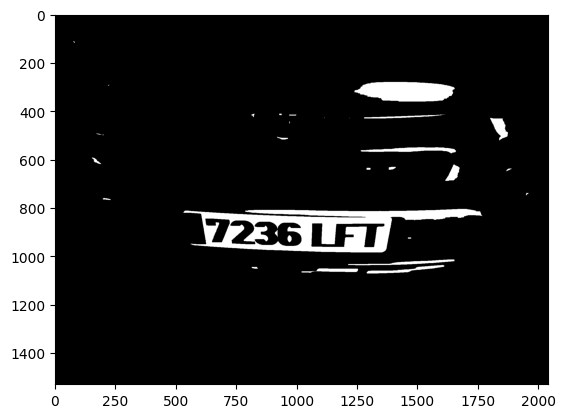

In [172]:
#quitar linias finas elemento que cauan problemas

median = cv.medianBlur(edge_touching_removed, 3)
ret, th = cv.threshold(median, 0, 255, cv.THRESH_BINARY+cv.THRESH_OTSU)
kernel = np.ones((3,3), np.uint8)
img_erosion = cv.erode(th, kernel, iterations=4)
opening = cv.morphologyEx(th, cv.MORPH_ERODE,  np.ones((1,30), np.uint8))


plt.imshow(opening, cmap="gray")


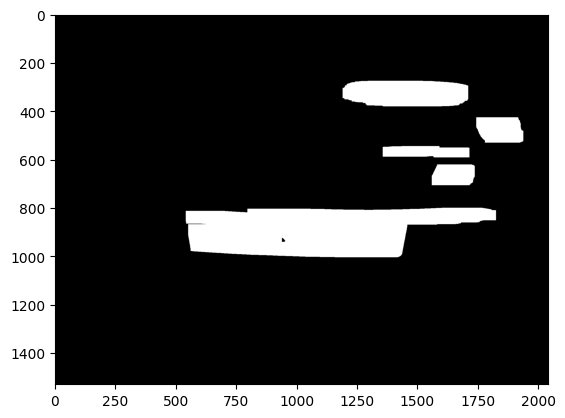

In [173]:
img_erosion = cv.erode(opening, kernel, iterations=7)
img_dilation = cv.dilate(img_erosion, kernel, iterations=7)
img_dilation = cv.dilate(img_dilation, np.ones((2,9), np.uint8), iterations=15)
img_dilation = cv.dilate(img_dilation, kernel, iterations=5)
plt.imshow(img_dilation, cmap="gray")

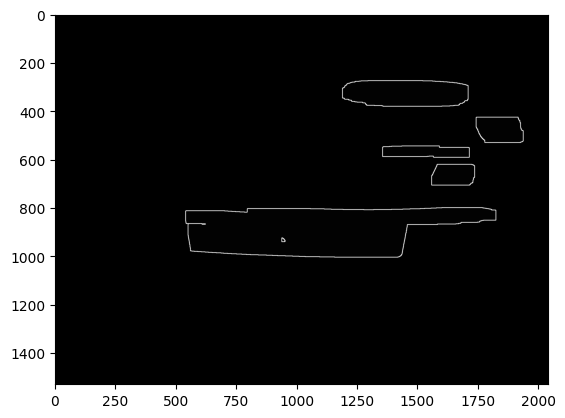

In [174]:
cnts,_=cv.findContours(cv.Canny(img_dilation,100,200),cv.RETR_LIST,cv.CHAIN_APPROX_SIMPLE)
contornos =  cv.drawContours((img_dilation//255),cnts,-1,(100,100,100),2)
plt.imshow(contornos, cmap="gray")

In [175]:
contornos_millor=cnts[0]
area_max=0
for c in cnts:
    area = cv.contourArea(c)
    if area>area_max:#len(approx)==4 and area>4000:
        area_max=area
        contornos_millor=c
        x_esquerra,y_esquerra,largo,ancho = cv.boundingRect(c)

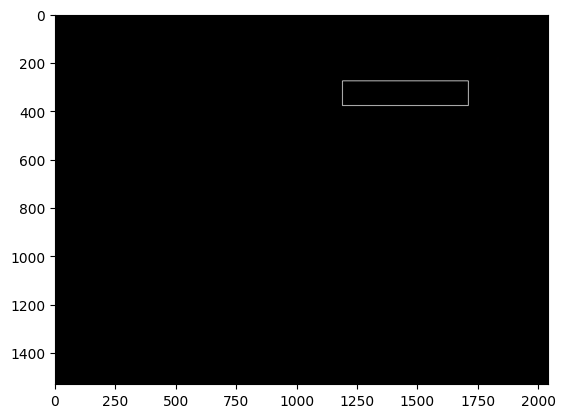

In [176]:
epsilon = 0.02*cv.arcLength(contornos_millor,True)
approx = cv.approxPolyDP(contornos_millor,epsilon,True)
#print(len(approx))
x,y,w,h = cv.boundingRect(approx)

rec = cv.rectangle(img//255,(x,y),(x+w,y+h),(255,255,255),2)
plt.imshow(rec, cmap="gray")

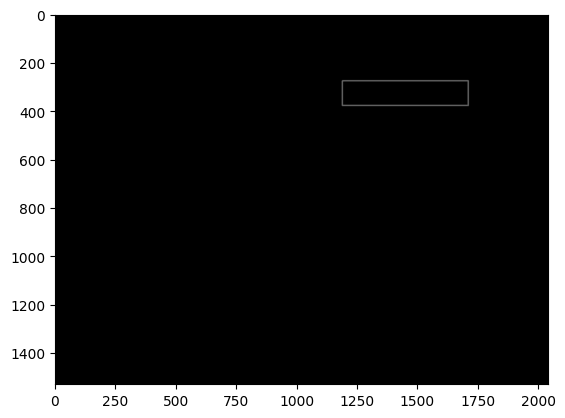

In [177]:
cnts_matricula,_=cv.findContours(cv.Canny(rec,100,200),cv.RETR_LIST,cv.CHAIN_APPROX_SIMPLE)
contornos_matricula =  cv.drawContours((rec//255),cnts_matricula,-1,(100,100,100),2)
plt.imshow(contornos_matricula, cmap="gray")

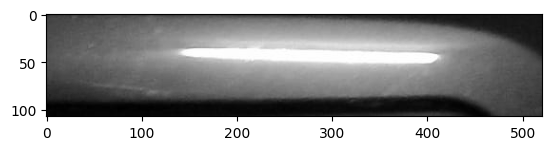

In [178]:
imagen_recortada = img_gris[y:y+ancho,x:x+largo]
plt.imshow(imagen_recortada,cmap="gray")

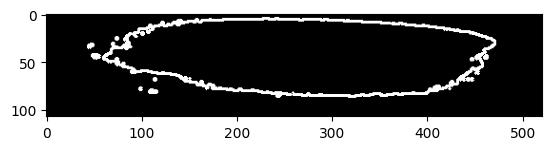

In [184]:
bi_matricula1, bi_matricula = cv.threshold(imagen_recortada, 0, 255, cv.THRESH_BINARY+cv.THRESH_OTSU)
cnts_pequeño,_=cv.findContours(cv.Canny(bi_matricula,100,200),cv.RETR_LIST,cv.CHAIN_APPROX_SIMPLE)
contornos_pequeño =  cv.drawContours((imagen_recortada//255),cnts_pequeño,-1,(100,100,100),2)
plt.imshow(contornos_pequeño, cmap="gray")

1


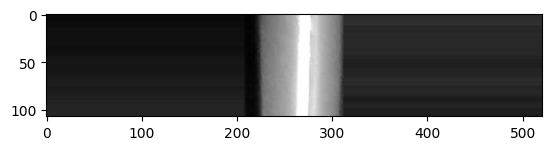

In [185]:

gray = cv.bitwise_not(imagen_recortada)
thresh = cv.threshold(gray, 0, 255,	cv.THRESH_BINARY | cv.THRESH_OTSU)[1]
thresh = 255 - thresh
plt.imshow(thresh,cmap="gray")

cnts,_=cv.findContours(cv.Canny(img_dilation,100,200),cv.RETR_LIST,cv.CHAIN_APPROX_SIMPLE)
contornos_millor=cnts[0]
area_max=0
for c in cnts:
    area = cv.contourArea(c)
    if area>area_max:#len(approx)==4 and area>4000:
        area_max=area
        contornos_millor=c
        
angle  = cv.minAreaRect(contornos_millor)[-1]

if angle < -45:
	angle =  (-90 + angle)
	
 
else:
    angle = ( 90 - angle)
    print(1)

(h, w) = imagen_recortada.shape[:2]
center = (w // 2, h // 2)
M = cv.getRotationMatrix2D(center, -angle, 1.0)
rotated = cv.warpAffine(imagen_recortada, M, (w, h), flags=cv.INTER_CUBIC, borderMode=cv.BORDER_REPLICATE)
 
plt.imshow(rotated,cmap="gray")


In [186]:
import pytesseract
#pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract'
pytesseract.pytesseract.tesseract_cmd = 'C:/Program Files/Tesseract-OCR/tesseract'

In [187]:
text = pytesseract.image_to_string(rotated,config='--psm 11')
print('PLACA: ',text)

PLACA:  


In [188]:
#solo funciono si detecta todos los elementos de la maricula, elimina los resultados incorecots que
#no son parte de la matricula pero por estar de fondo en la imgen el ocr lo detecta com un caracter
#elimina gran parte de estos caracterres erroneos

count = 0
ll = list(text.lower())
if ' ' in  ll:
    ll.remove(" ")
matricula = ""
for letra in ll:
    if count < 4:
        if letra in ("1234567890"):
            count += 1
            matricula += letra
        else:
            count = 0
    else:
        if letra in ("wrtypsdfghjklzxcvbnm"):
            count += 1
            matricula += letra.upper()

print(matricula)

In [189]:
{'2': '8425MFR', '3':'2736LFT', '4':'5534HWK', '10':'1556GMZ', '11':'0182GLK', '12':'3044JMB', '13':'6929LKK',
  '14':'3660CRT', '15':'2344KJP', '16':'0907JRF', '17':'6401JBX', '18':'4674FHC', '20':'0012HLY', '21':'7713MFV'
  , '22':'8234MHS', '23':'1087MDR', '24':'3641JGY', '25':'4236KMV', '26':'5652JTM', '27':'0214JWP', '28':'6603DZM', 
  '29':'9058GMF', '30':'3467FPD', '32':'8798GYS', '33':'4840KHP', '34':'1062FNT', '35':'1943GFW', '36':'2376CHN'
  , '37':'2780KTT', '38':'2968FZC', '39':'2254HZL', '40':'3678GXN', '41':'3396GDF', '42':'5317JVM', '43':'4146HXM', 
  '44':'2304LSC', '45':'0424JLP', '46':'3044JMB', '47':'9575LCM', '48':'2354HKR'}

{'2': '8425MFR',
 '3': '2736LFT',
 '4': '5534HWK',
 '10': '1556GMZ',
 '11': '0182GLK',
 '12': '3044JMB',
 '13': '6929LKK',
 '14': '3660CRT',
 '15': '2344KJP',
 '16': '0907JRF',
 '17': '6401JBX',
 '18': '4674FHC',
 '20': '0012HLY',
 '21': '7713MFV',
 '22': '8234MHS',
 '23': '1087MDR',
 '24': '3641JGY',
 '25': '4236KMV',
 '26': '5652JTM',
 '27': '0214JWP',
 '28': '6603DZM',
 '29': '9058GMF',
 '30': '3467FPD',
 '32': '8798GYS',
 '33': '4840KHP',
 '34': '1062FNT',
 '35': '1943GFW',
 '36': '2376CHN',
 '37': '2780KTT',
 '38': '2968FZC',
 '39': '2254HZL',
 '40': '3678GXN',
 '41': '3396GDF',
 '42': '5317JVM',
 '43': '4146HXM',
 '44': '2304LSC',
 '45': '0424JLP',
 '46': '3044JMB',
 '47': '9575LCM',
 '48': '2354HKR'}

In [180]:
'''
im_floodfill = ((aux>2) * aux).copy()
 
h, w = aux.shape[:2]
mask = np.zeros((h+2, w+2), np.uint8)
 
# Floodfill from point (0, 0)
cv.floodFill(im_floodfill, mask, (0,0), 255)
 
# Invert floodfilled image
im_floodfill_inv = cv.bitwise_not(im_floodfill)
 
# Combine the two images to get the foreground.
im_out = aux | im_floodfill_inv
 
plt.imshow( im_out,cmap="gray")
--
imagen_final=img_gris*(im_out>200)
plt.imshow(imagen_final,cmap="gray")
--
imagen_recortada=imagen_final[y_esquerra:y_esquerra+ancho,x_esquerra:x_esquerra+largo]
plt.imshow(imagen_recortada,cmap="gray")
'''

'\nim_floodfill = ((aux>2) * aux).copy()\n \nh, w = aux.shape[:2]\nmask = np.zeros((h+2, w+2), np.uint8)\n \n# Floodfill from point (0, 0)\ncv.floodFill(im_floodfill, mask, (0,0), 255)\n \n# Invert floodfilled image\nim_floodfill_inv = cv.bitwise_not(im_floodfill)\n \n# Combine the two images to get the foreground.\nim_out = aux | im_floodfill_inv\n \nplt.imshow( im_out,cmap="gray")\n'

https://es.stackoverflow.com/questions/141818/como-enderezo-una-imagen-en-python

https://pyimagesearch.com/2017/02/20/text-skew-correction-opencv-python/